✅ 이미지 로드 성공! (420, 414, 3)


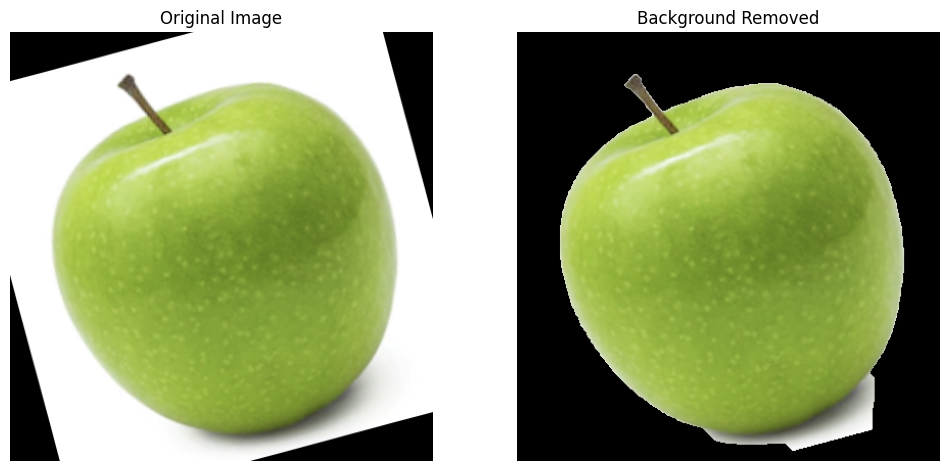

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = r"내 이미지 경로"
image = cv2.imdecode(np.fromfile(image_path, dtype=np.uint8), cv2.IMREAD_COLOR)

if image is None:
    print("❌ 이미지 로드 실패")
else:
    print("✅ 이미지 로드 성공!", image.shape)

    image_copy = image.copy()

    mask = np.zeros(image.shape[:2], np.uint8)

    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    height, width = image.shape[:2]
    rect = (10, 10, width - 20, height - 20) 

    cv2.grabCut(image_copy, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
    result = image_copy * mask2[:, :, np.newaxis] 

    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    original_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(result_rgb)
    plt.title("Background Removed")
    plt.axis("off")

    plt.show()
